<a href="https://colab.research.google.com/github/julievera7/CoderDataScience/blob/main/CursoCoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera entrega
## Resumen de la Base de Datos Adult Census Income

La base de datos Adult Census Income, proveniente del repositorio UCI Machine Learning, disponbile en Kaggle, contiene información demográfica y socio-económica de aproximadamente 48,000 individuos en Estados Unidos, extraída del Censo de 1994.

El dataset cuenta con 15 atributos, incluyendo edad, nivel educativo, ocupación, estado civil, raza, género, horas trabajadas por semana y origen étnico. La variable objetivo, income, es una clasificación binaria con valores ">50K" y "<=50K". Algunos atributos tienen valores faltantes, como "workclass" y "occupation", lo que requiere estrategias de limpieza y manejo de datos.

Desde una perspectiva analítica, este conjunto de datos permite aplicar técnicas de preprocesamiento, análisis exploratorio de datos (EDA) y modelos de clasificación como árboles de decisión, estudios de correlación, entre otros.


## Dataset - Referencias

###US Census Data (Adult Income) - Kaggle

1.- Rows: ~48,000

2.- Columns: 15+

3.- Description: Contains demographic information, education, work class, occupation, and income brackets

4.- URL: https://www.kaggle.com/datasets/uciml/adult-census-income

**Datos sobre el dataset (*)**

Ronny Kohavi y Barry Becker (minería de datos y visualización, Silicon Graphics) extrajeron estos datos de la base de datos de la Oficina del Censo de 1994. Se extrajo un conjunto de registros razonablemente limpios utilizando las siguientes condiciones: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0))

**Descripción de fnlwgt (peso final)**

Los pesos de los archivos de la Encuesta de población actual (CPS) se controlan con estimaciones independientes de la población civil no institucional de los EE. UU. Estos son preparados mensualmente para nosotros por la División de población aquí en la Oficina del Censo. Utilizamos 3 conjuntos de controles. Estos son:

1.- Una estimación de una sola celda de la población de 16 años o más para cada estado.

2.- Controles de origen hispano por edad y sexo.

3.- Controles por raza, edad y sexo.

(*) Tomado de https://www.kaggle.com/datasets/uciml/adult-census-income/data

In [45]:
import pandas as pd

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/julievera7/CoderDataScience/refs/heads/main/adult.csv"

# Cargar el dataset en un DataFrame
data = pd.read_csv(url, header=None, na_values="?")

# Cambiar los nombres de las columnas
data.columns = ["edad", "clasetrabajadora", "fnlwgt", "educacion", "educacion_num", "estadocivil", "ocupacion", "relacion", "raza", "sexo", "capital_gain", "capital_loss", "horas_por_semana", "pais_origen", "ingreso"]
#Tenia un error, dado que tenia un registro string


print("Número de registros: " + str(len(data)))


Número de registros: 32562


## Hipótesis

El nivel educativo no tiene un impacto significativo en la probabilidad de que una persona gane más de $50K al año.

## Pregunta adicional

1.  ¿Existe una diferencia en los ingresos entre hombres y mujeres? - magnitud-


## Limpiar la base - datos ausentes



In [35]:
#En el dataset, los valores ausentes
print(" \nAntes de eliminar los datos ausentes:\n ")
print(data.isnull().sum())
#Eliminar los datos ausentes
data.dropna(inplace=True)
#Verificar de vuelta

print(" \nLuego de eliminar los datos ausentes:\n ")

print(data.isnull().sum())

print("Número de registros: " + str(len(data)))

 
Antes de eliminar los datos ausentes:
 
edad                   0
clasetrabajadora    1836
fnlwgt                 0
educacion              0
educacion_num          0
estadocivil            0
ocupacion           1843
relacion               0
raza                   0
sexo                   0
capital_gain           0
capital_loss           0
horas_por_semana       0
pais_origen          583
ingreso                0
dtype: int64
 
Luego de eliminar los datos ausentes:
 
edad                0
clasetrabajadora    0
fnlwgt              0
educacion           0
educacion_num       0
estadocivil         0
ocupacion           0
relacion            0
raza                0
sexo                0
capital_gain        0
capital_loss        0
horas_por_semana    0
pais_origen         0
ingreso             0
dtype: int64
Número de registros: 30163


## Relación entre ingreso y educación - graficos

### Grafico de caja Distribuciòn de edad segun nivel educativo e ingreso.




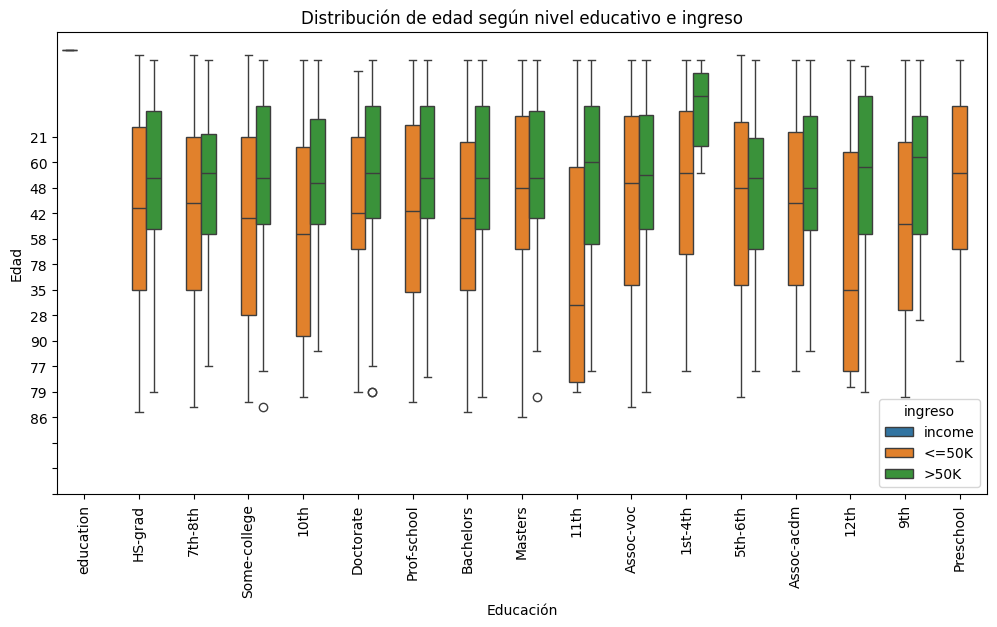

In [36]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x="educacion", y="edad", hue="ingreso", data=data)
plt.xticks(rotation=90)
data['edad'] = pd.to_numeric(data['edad'], errors='coerce')
plt.yticks(ticks=np.arange(data["edad"].min(), data["edad"].max(), step=5))
plt.xlabel("Educación")
plt.ylabel("Edad")
plt.title("Distribución de edad según nivel educativo e ingreso")
plt.show()

## Hallazgos

Hay una relación entre la edad y el ingreso, independientemente del nivel educativo, una buena parte de las personas con edad adulta media entre 40-57 años, tienen ingresos mayores a 50K.

Sin embargo, aquellos con un nivel educativo superior a estudios de pregrado (Doctorate, Masters, Prof-scholl) tienen medianas de edad más elevenadas.

Respecto a los valores atípicos, se observa en los trabajadores que superan los 80 años.

Por otro lado, al comprar las cajas (rangos), vemos como hay una mayor variabilidad (más largos) en los trabajadores que ganan menos de 50K.



In [37]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
mayores_50K = data[data["ingreso"] == ">50K"]["edad"]
menores_50K = data[data["ingreso"] == "<=50K"]["edad"]

media_mayores_50K = mayores_50K.mean()
mediana_mayores_50K = mayores_50K.median()

media_menores_50K = menores_50K.mean()
mediana_menores_50K = menores_50K.median()

print(f"Trabajadores con ingreso >50K: Media = {media_mayores_50K:.2f}, Mediana = {mediana_mayores_50K:.2f}")
print(f"Trabajadores con ingreso <=50K: Media = {media_menores_50K:.2f}, Mediana = {mediana_menores_50K:.2f}")


Trabajadores con ingreso >50K: Media = 43.96, Mediana = 43.00
Trabajadores con ingreso <=50K: Media = 36.61, Mediana = 34.00


#Relación entre ingresos y sexo

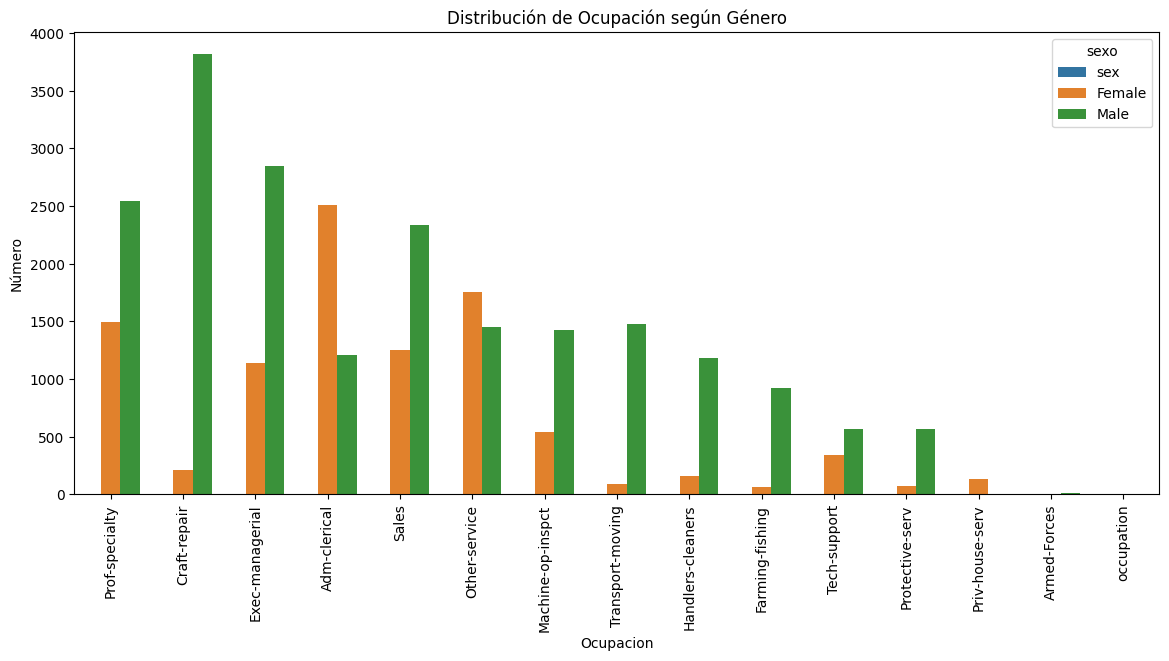

In [38]:
plt.figure(figsize=(14, 6))
sns.countplot(x='ocupacion', hue='sexo', data=data, order=data['ocupacion'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Ocupacion")
plt.ylabel("Número")
plt.title("Distribución de Ocupación según Género")
plt.show()

<ipython-input-43-5cf998c92171>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["educacion_num"] = data["educacion_num"].astype(int)  #


Matriz de correlación:
               sexo_num  ingreso_num      edad  educacion_num
sexo_num       1.000000     0.216699  0.081993       0.006157
ingreso_num    0.216699     1.000000  0.241998       0.335286
edad           0.081993     0.241998  1.000000       0.043526
educacion_num  0.006157     0.335286  0.043526       1.000000


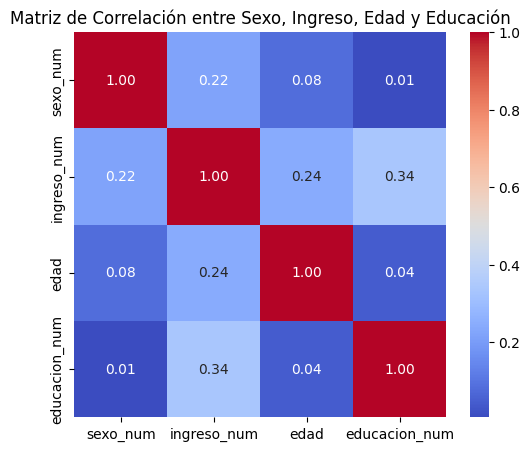

In [43]:
# Convertir variables categóricas a numéricas para la correlación
data["sexo_num"] = data["sexo"].map({"Male": 1, "Female": 0})  # 1 para hombres, 0 para mujeres
data["ingreso_num"] = data["ingreso"].map({">50K": 1, "<=50K": 0})  # 1 si gana más de 50K, 0 si gana menos
data = data[data["educacion_num"].apply(lambda x: str(x).isdigit())]
#Tenia un error, dado que tenia un registro string
data["educacion_num"] = data["educacion_num"].astype(int)

# Seleccionar las variables para la correlación
# Changed 'education.num' to 'educacion_num' to match the actual column name in the DataFrame.
variables_interes = data[["sexo_num", "ingreso_num", "edad", "educacion_num"]]
correlation_matrix = variables_interes.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Sexo, Ingreso, Edad y Educación")
plt.show()